In [110]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
#from ngallery_utils import DATASETS

import numpy as np
import os

#import matplotlib.pyplot as plt,colors
from matplotlib import pyplot as plt, colors
from matplotlib.cm import get_cmap
from matplotlib import cm

import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cf

from distributed import Client
from ncar_jobqueue import NCARCluster



In [111]:
cluster = NCARCluster()
cluster.scale(10)
client = Client(cluster)
client

/glade/work/rneale/python/miniconda3/envs/neale_wrf/lib/python3.9/site-packages/dask_jobqueue/core.py:255: FutureWarning: job_extra has been renamed to job_extra_directives. You are still using it (even if only set to []; please also check config files). If you did not set job_extra_directives yet, job_extra will be respected for now, but it will be removed in a future release. If you already set job_extra_directives, job_extra is ignored and you can remove it.
  warnings.warn(warn, FutureWarning)
/glade/work/rneale/python/miniconda3/envs/neale_wrf/lib/python3.9/site-packages/dask_jobqueue/core.py:274: FutureWarning: env_extra has been renamed to job_script_prologue. You are still using it (even if only set to []; please also check config files). If you did not set job_script_prologue yet, env_extra will be respected for now, but it will be removed in a future release. If you already set job_script_prologue, env_extra is ignored and you can remove it.
  warnings.warn(warn, FutureWarnin

Connection method: Cluster object,Cluster type: dask_jobqueue.PBSCluster
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/rneale/proxy/46701/status,
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/rneale/proxy/46701/status,Workers: 0
Total threads: 0,Total memory: 0 B
Comm: tcp://10.148.0.5:41857,Workers: 0
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/rneale/proxy/46701/status,Total threads: 0
Started: Just now,Total memory: 0 B


In [118]:
# Global stuff
lon_min = -82. ; lon_max = -35.
lat_min = -15. ; lat_max = 15.

day0 = '2010-06-01'
day1 = '2010-06-30'

clon_min = 360.+lon_min
clon_max = 360.+lon_max


#cam_only = True ; pset = 'cam' ; nplots = 2 ; xfsize = 30 ; case = ['100 km + L32','6 km + L71'] ; iobs=0
cam_only = False ; pset = 'cam_imerge' ; nplots = 3 ; xfsize = 30 ; case = ['iMERGE (4km)','100 km + L32','6 km + L71'] ; iobs=1

#cam_only = False ; pset = 'obs-wrf-hov'; nplots = 3 ; xfsize = 18 ; case = ['iMERGE','TRMM','WRF(4km)']

#case = ['TRMM-25km','WRF-4km','CAM-SE-6km']
#case = ['IMERG-GPM-4km','WRF-4km','CAM-SE-6km']



##### LEVELS FOR PLOTTING #####

lev0 = 2 ; nlevs = 40
#levels = [lev0 + 2*n for n in range(nlevs)]

#levels = [1.,2.,3.,4.,5.,6.,7.,8.,9.,10.,11.,12.,13.,14.,15.,16.,18.,20.,22.,23.,24.,25.,30.,35.,40.,45.,50.,55.,60.]
levels = [1.,2.,5.,10.,15.,20.,25.,30.,35.,40.,50.,60.,70]

dir

############ GLOBAL STUFF ###########


## WRF stuff
file_wrf = "/glade/scratch/rneale/SAAG/wrf2d_d01_daily_tot_201006.nc"
ds_wrf = xr.open_dataset(file_wrf)
da_time = ds_wrf['Times']

# CAM stuff (datasets pulled later)
#dir_cam = '/glade/scratch/patc/archive/'
dir_cam = '/glade/campaign/cgd/projects/NCGD0051/PRELIM_RESULTS/cesm2_2_rel/'

#file_cam = ['/glade/scratch/patc/archive/f.e22b6.DEFAULT.ne30x1.TUNE_02/atm/hist/f.e22b6.DEFAULT.ne30x1.TUNE_02.cam.h0.2010-06.nc',
#file_cam =  ['f.e22b6.SAMwrf01.ne30x1.TUNE_02/atm/hist/f.e22b6.SAMwrf01.ne30x1.TUNE_02.cam.h0.2010-06.nc',
#             'f.e22b6.SAMwrf01.ne30x2.TUNE_02/atm/hist/f.e22b6.SAMwrf01.ne30x2.TUNE_02.cam.h0.2010-06.nc',
#            'f.e22b6.SAMwrf01.ne30x4.TUNE_02/atm/hist/f.e22b6.SAMwrf01.ne30x4.TUNE_02.cam.h0.2010-06.nc',
#            'f.e22b6.SAMwrf01.ne30x8.TUNE_02/atm/hist/f.e22b6.SAMwrf01.ne30x8.TUNE_02.cam.h0.2010-06.nc',
#            'f.e22b6.SAMwrf01.ne30x16.TUNE_01/atm/hist/f.e22b6.SAMwrf01.ne30x16.TUNE_01.cam.h0.2010-06.nc',
#            'f.e22b6.SAMwrf01.ne30x16.L71-Opt5_TUNE_05/atm/hist/f.e22b6.SAMwrf01.ne30x16.L71-Opt5_TUNE_05.cam.h0.2010-06.nc']

file_cam =  ['f.e22b6.SAMwrf01.ne30x1.TUNE_02/atm/hist/f.e22b6.SAMwrf01.ne30x1.TUNE_02.cam.h0.2010-06.nc',
            'f.e22b6.SAMwrf01.ne30x16.L71-Opt5_TUNE_05/atm/hist/f.e22b6.SAMwrf01.ne30x16.L71-Opt5_TUNE_05.cam.h0.2010-06.nc']

#file_cam = ['f.e22b6.SAMwrf01.ne30x1.L71opt5_TUNE_02',
#            'f.e22b6.SAMwrf01.ne30x4.L71opt5_TUNE_02',
#            'f.e22b6.SAMwrf01.ne30x8.L71opt5_TUNE_02']
            



In [128]:
# Observations TRMM

#print("Grabbing TRMM")
#file_obs = '/glade/p/cgd/amp/rneale/data/TRMM/daily/3B42.2010.daily_V7.nc'
#ds_obs =  xr.open_dataset(file_obs)

# Obsrevations iMERGE

print("Grabbing iMERGE")
dir_obs2 = '/glade/scratch/rneale/SAAG/obs/2010/06/*20100605*nc'
ds_obs2 = xr.open_mfdataset(dir_obs2, decode_cf=True, decode_times = True, parallel=True) 

print('done obs.')



ds_obs2.precipitationCal


## OBS 2 ###

prec_obs2 = ds_obs2['precipitationCal'].sel(time=slice(day0, day1))

prec_obs2_mean = 24*prec_obs2.mean('time') # mm/hr -> mm/day
#prec_obs2_mean = 24*prec_obs2.sel(lat=slice(0.,10.)).mean('lat') # mm/hr -> mm/day


Grabbing iMERGE
done obs.


# Handling WRF files to makes them xarray compatable

# Plotting

0
1
<xarray.DataArray (ncol: 48602)>
array([5.3482503e-09, 5.4784377e-09, 5.4518035e-09, ..., 3.6575470e-10,
       2.2554471e-10, 2.8667063e-10], dtype=float32)
Coordinates:
    time     object 2010-07-01 00:00:00
Dimensions without coordinates: ncol
2
<xarray.DataArray (ncol: 1167113)>
array([3.8209286e-08, 3.6786481e-08, 3.2151579e-08, ..., 3.2309209e-09,
       3.2430716e-09, 3.7823651e-09], dtype=float32)
Coordinates:
    time     object 2010-07-01 00:00:00
Dimensions without coordinates: ncol


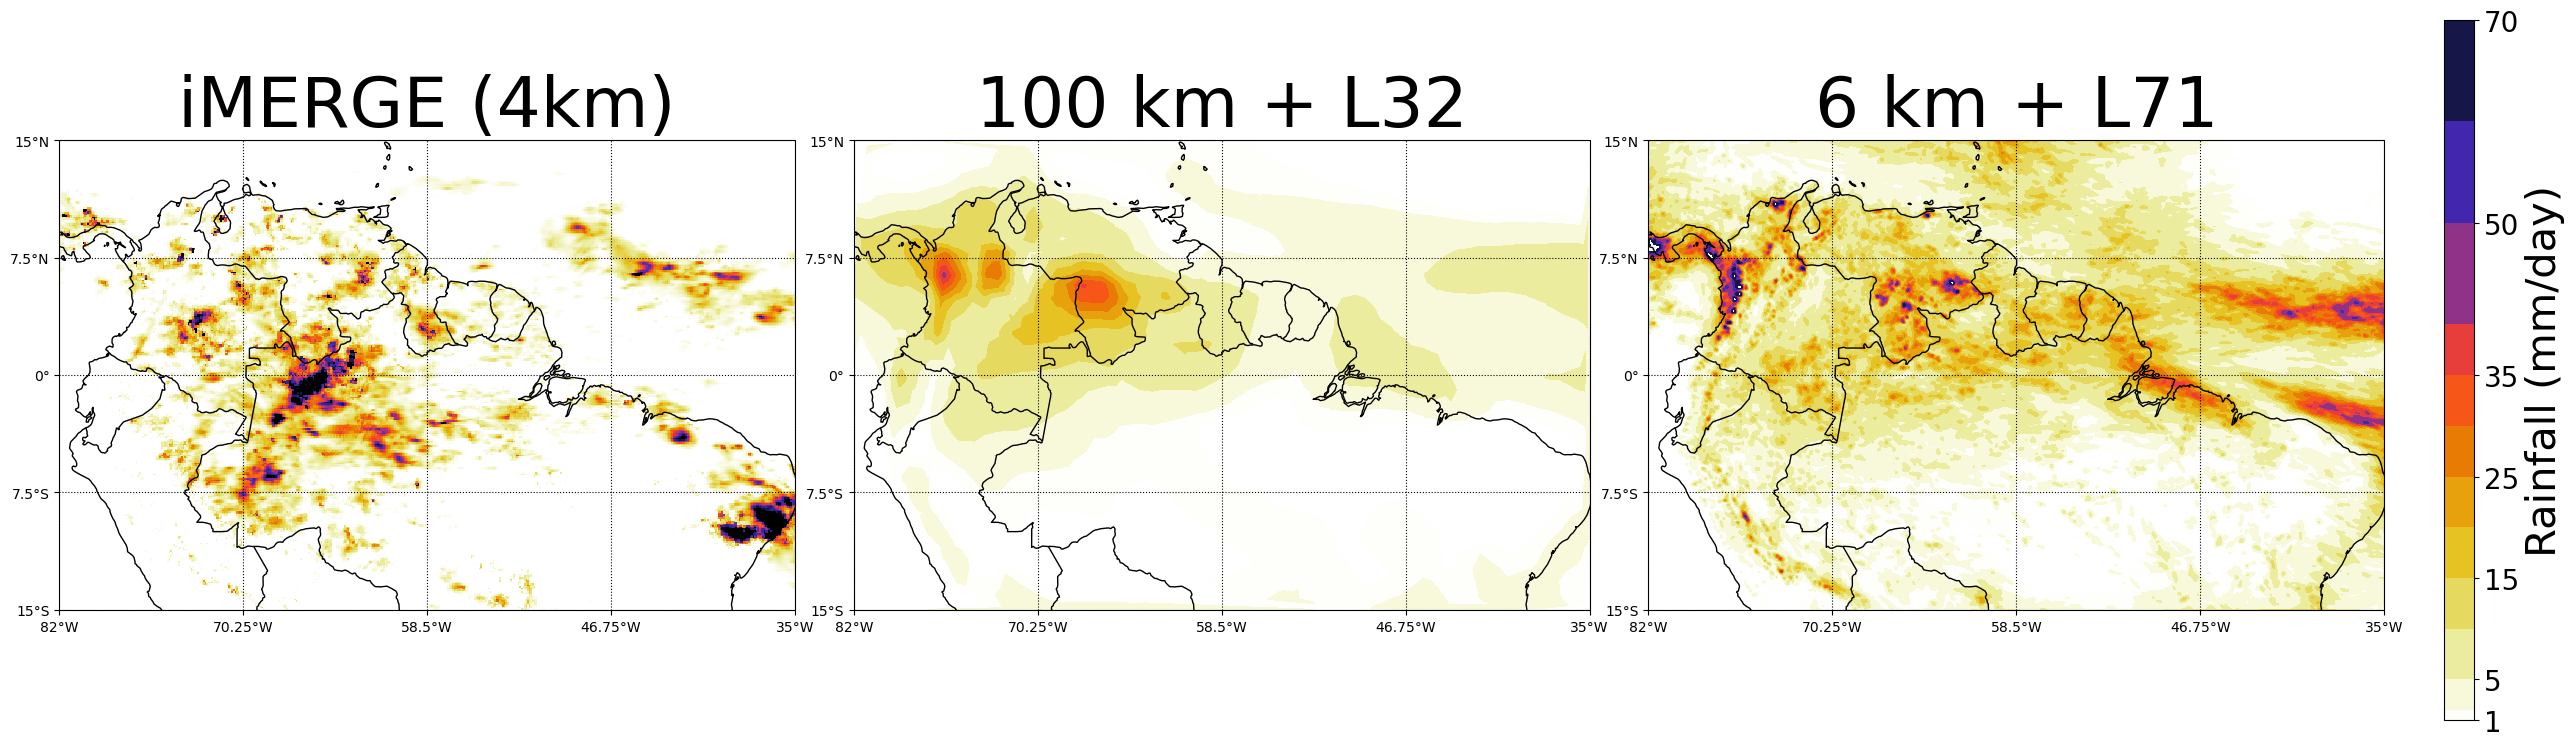

In [129]:
crs = ccrs.PlateCarree()
#crs = ccrs.Mollweide()
fig,ax = plt.subplots(ncols=nplots,figsize=[xfsize, 10],subplot_kw={'projection': crs})
cmap = "CMRmap_r"


#lon = prc_mean.lon
#lat = prc_mean.lat

# Subset of colormap
#cmap = cm.get_cmap('PuBuGn', 10)
#print(cmap)
#new_cmap = colors.LinearSegmentedColormap.from_list(cmap.name, cmap.colors)

    

### PLOT LOOP ###

for ii in range(0,nplots): 

    print(ii)

#    if not cam_only:
#        if ii==1: # Obs.
#            plotx = ax[ii].pcolormesh(prec_obs.lon,prec_obs.lat,prec_obs_mean,cmap=cmap,vmin=min(levels),vmax=max(levels))
#            plotx = ax[ii].pcolormesh(prec_obs.lon,prec_obs.time,prec_obs_mean,cmap="gist_ncar_r",vmin=min(levels),vmax=max(levels))
    if ii==0: # Obs.
        plotx = ax[ii].pcolormesh(prec_obs2.lon,prec_obs2.lat,prec_obs2_mean,cmap=cmap,vmin=min(levels),vmax=max(levels))
#            plotx = ax[ii].pcolormesh(prec_obs2.lon,prec_obs2.time,prec_obs2_mean,cmap="gist_ncar_r",vmin=min(levels),vmax=max(levels))
#        if ii==2: # WRF
#            plotx = ax[ii].pcolormesh(lon, lat, prc_mean, cmap=cmap,vmin=min(levels),vmax=max(levels))
#        if ii==3: # SE
#            plotx = ax[ii].tricontourf(clon_sam,clat_sam,cam_prc_mean_sam, levels=levels,cmap=cmap)

#    if cam_only: # SE

    #### CAM ####
    else:
        ds_cam = xr.open_dataset(dir_cam+file_cam[ii-iobs]).squeeze('time')
       

        prect_cam = ds_cam['PRECC'] + ds_cam['PRECL']
        print(prect_cam)


        cam_prc_mean = 86400.*1000.*prect_cam
    #        cam_prc_std = cam_prc.std('time')

    # Need to samp because this is a global field

        clon = ds_cam.lon
        clat = ds_cam.lat

    # Sample only the SAM points
        log_sam = (clon > clon_min) & (clon < clon_max) & (clat > lat_min) & (clat < lat_max)

        id_sam = np.where(log_sam)

        clat_sam = clat[log_sam]
        clon_sam = clon[log_sam]-360.
        cam_prc_mean_sam = cam_prc_mean[id_sam]

    # PLOT CAM#
        #plotx = ax[ii].tricontourf(clon_sam,clat_sam,cam_prc_mean_sam, levels=levels,cmap=cmap)
        plotx = ax[ii].tricontourf(clon_sam,clat_sam,cam_prc_mean_sam, levels=levels,cmap=cmap)

    
    
    
    
    
    
    # Mask and ridlines
    
    ax[ii].coastlines()   
    ax[ii].add_feature(cf.BORDERS)
    ax[ii].grid(color="black", linestyle="dotted")

    # x-axes
    
    ax[ii].set_xticks(np.linspace(lon_min, lon_max, 5), crs=crs)  
    ax[ii].set_xlim((lon_min,lon_max))
    lon_formatter = LongitudeFormatter()
    ax[ii].xaxis.set_major_formatter(lon_formatter)
    
    # y-axes
    
    ax[ii].set_yticks(np.linspace(lat_min, lat_max, 5), crs=crs)  
    ax[ii].set_ylim((lat_min,lat_max))
    lat_formatter = LatitudeFormatter()
    ax[ii].yaxis.set_major_formatter(lat_formatter)
    
    
    ax[ii].set_title(case[ii],fontsize=50)
    

    
    
cb_ax = fig.add_axes([0.92, 0.15, 0.01, 0.7]) # xmin,ymin,dx,dy (Location of Colorbar)
plt.colorbar(plotx, cax=cb_ax,orientation="vertical",spacing='proportional').set_label(label='Rainfall (mm/day)',size=30)

cb_ax.tick_params(labelsize=20) 

n = 1  # Keeps every nth+2 label
[l.set_visible(False) for (i,l) in enumerate(cb_ax.yaxis.get_ticklabels()) if i % n != 0]

#for label in cb_ax.yaxis.get_ticklabels():
#    label.set_visible(False)
#for label in cb_ax.yaxis.get_ticklabels()[3]:
#    label.set_visible(True) 
    
plt.subplots_adjust(wspace=0.08, hspace=0.05)


plt.show()

fig_dir = ""
fig.savefig('sam_richter_test_new_cbar_'+pset+'.png', dpi=400, bbox_inches='tight') 